# Open CV (Computer Vision)

In [1]:
import cv2

In [2]:
img = cv2.imread('robinwilliams.jpg')

In [3]:
dimensions = img.shape
print(dimensions)

(1080, 1920, 3)


In [4]:
# height, width, number of channels in image
height = img.shape[0]
width = img.shape[1]
channels = img.shape[2]

print('Image Dimension    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels)

Image Dimension    :  (1080, 1920, 3)
Image Height       :  1080
Image Width        :  1920
Number of Channels :  3


### Resize, Flip and Rotate

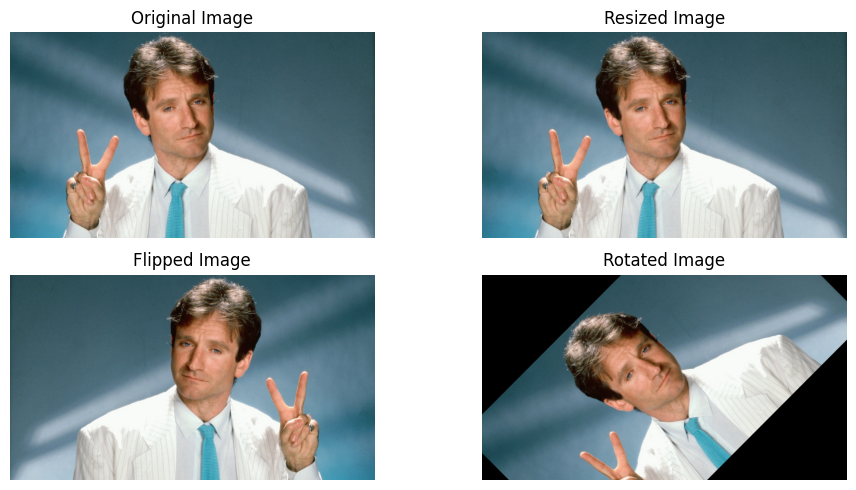

In [5]:
from matplotlib import pyplot as plt

# Read the image
img = cv2.imread('robinwilliams.jpg')

# Resize the image
resized_img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)  # Resize to half the original size

# Flip the image horizontally
flipped_img = cv2.flip(img, 1)  # 1 for horizontal flip, 0 for vertical flip, -1 for both

# Rotate the image
rows, cols = img.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)  # Rotate 45 degrees clockwise
rotated_img = cv2.warpAffine(img, rotation_matrix, (cols, rows))

# Display original and modified images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(221)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(222)
plt.title('Resized Image')
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(223)
plt.title('Flipped Image')
plt.imshow(cv2.cvtColor(flipped_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(224)
plt.title('Rotated Image')
plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


### BGR, RGB, HSV

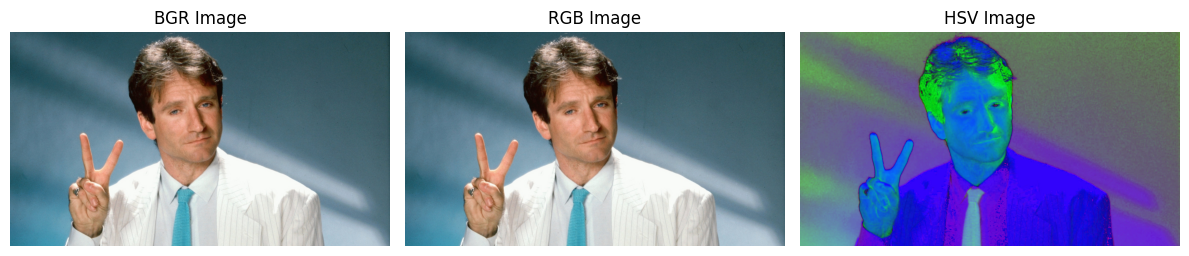

In [6]:
# Assuming OpenCV (cv2) is already imported

# Read the image
img = cv2.imread('robinwilliams.jpg')

# Convert BGR to RGB
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert BGR to HSV
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Display images in BGR, RGB, and HSV using matplotlib
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.title('BGR Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(132)
plt.title('RGB Image')
plt.imshow(rgb_img)
plt.axis('off')

plt.subplot(133)
plt.title('HSV Image')
plt.imshow(hsv_img)
plt.axis('off')

plt.tight_layout()
plt.show()


### Grayscale Image

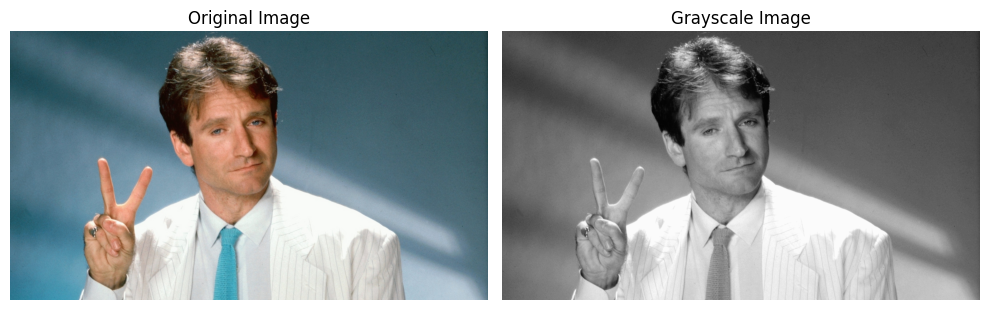

In [7]:
# Assuming OpenCV (cv2) is already imported

# Read the image
img = cv2.imread('robinwilliams.jpg')

# Convert image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display original and grayscale images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(122)
plt.title('Grayscale Image')
plt.imshow(gray_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


# Feature Detection

### Canny Edge Detection 

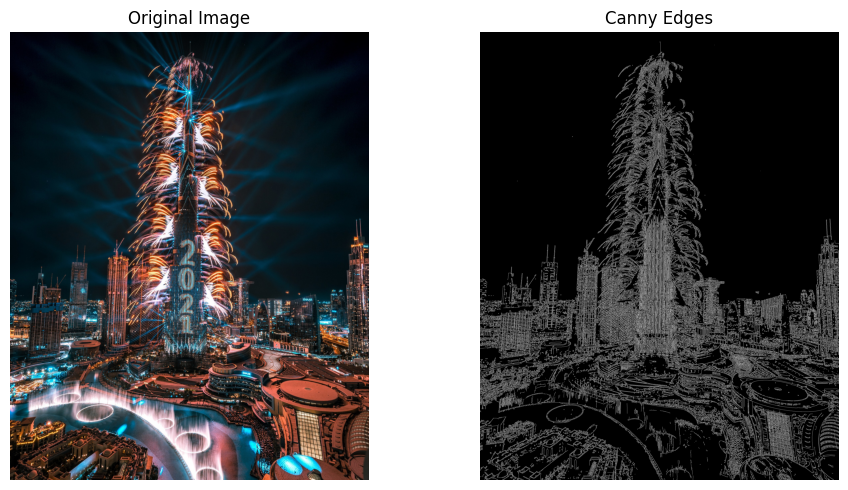

In [8]:
import cv2
from matplotlib import pyplot as plt

# Read the image
img = cv2.imread('burj.jpg')

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray_img, 100, 200)  # Adjust the thresholds as needed

# Display the original and Canny edges using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(122)
plt.title('Canny Edges')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


### Good Features To Track 

/var/folders/c8/6w2372kx4cqg___pmmln1q4h0000gn/T/ipykernel_32523/940777625.py:15: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


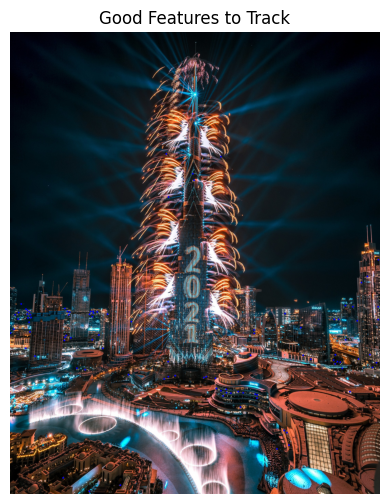

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
img = cv2.imread('burj.jpg')

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find good features to track
corners = cv2.goodFeaturesToTrack(gray_img, 100, 0.01, 10)  # Change parameters as needed

# Draw corners on the image
corners = np.int0(corners)
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 5, (255, 0, 0), -1)

# Display the image with detected corners using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Good Features to Track')
plt.axis('off')
plt.show()


# Object Detection 

### Cascade Classifier

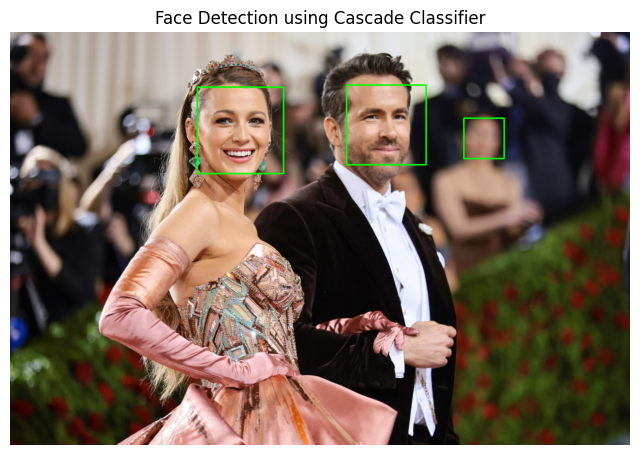

In [14]:
import cv2
from matplotlib import pyplot as plt

# Load the pre-trained cascade classifier
cascade_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Read the image
img = cv2.imread('ryan.jpg')

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces using the cascade classifier
faces = cascade_classifier.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=7)

# Draw rectangles around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with detected faces using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Face Detection using Cascade Classifier')
plt.axis('off')
plt.show()


# Feature Matching

### Match Template

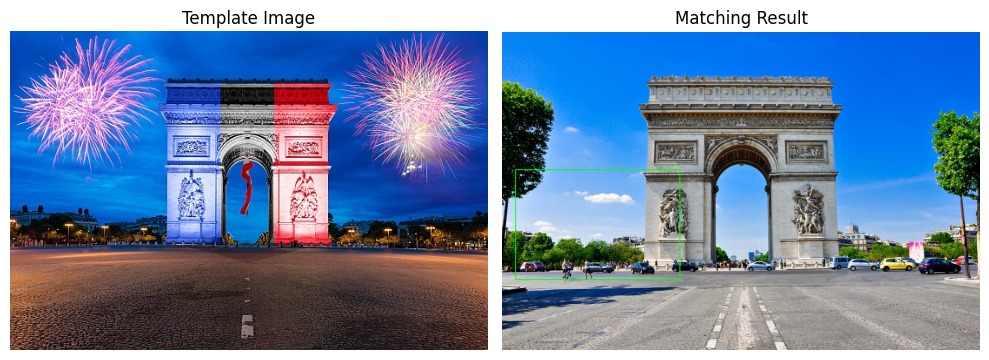

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the main image and template image
main_img = cv2.imread('arc.jpg')
template = cv2.imread('arccelebration.jpg')

# Convert the images to grayscale
main_gray = cv2.cvtColor(main_img, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Perform template matching
result = cv2.matchTemplate(main_gray, template_gray, cv2.TM_CCOEFF_NORMED)

# Get the location of the best match
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
bottom_right = (top_left[0] + template.shape[1], top_left[1] + template.shape[0])

# Draw a rectangle around the matched area
cv2.rectangle(main_img, top_left, bottom_right, (0, 255, 0), 2)

# Display the result using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.title('Template Image')
plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(122)
plt.title('Matching Result')
plt.imshow(cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


### Draw Matches

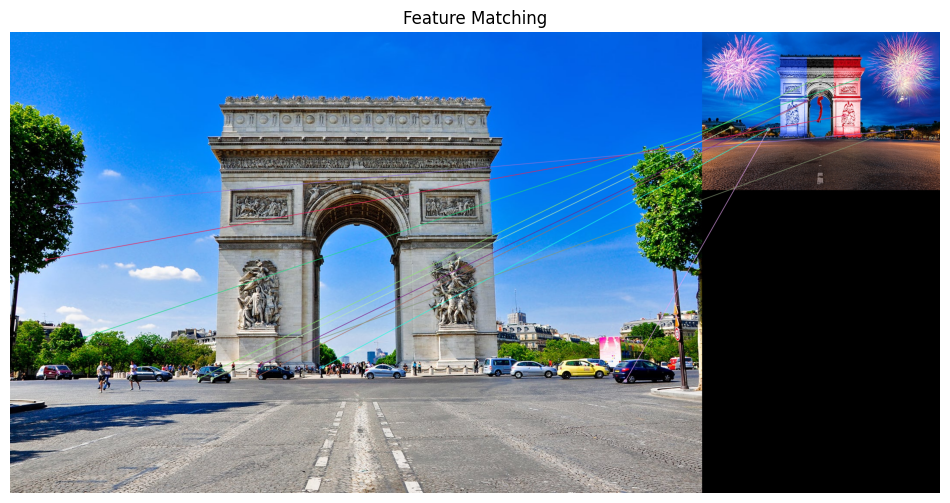

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the main image and query image
main_img = cv2.imread('arc.jpg')
query_img = cv2.imread('arccelebration.jpg')

# Convert the images to grayscale
main_gray = cv2.cvtColor(main_img, cv2.COLOR_BGR2GRAY)
query_gray = cv2.cvtColor(query_img, cv2.COLOR_BGR2GRAY)

# Initialize the ORB detector and detect keypoints and descriptors
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(main_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(query_gray, None)

# Create a BFMatcher object and match descriptors
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches
matching_result = cv2.drawMatches(main_img, keypoints1, query_img, keypoints2, matches[:10], None, flags=2)

# Display the matching result using matplotlib
plt.figure(figsize=(12, 6))
plt.imshow(cv2.cvtColor(matching_result, cv2.COLOR_BGR2RGB))
plt.title('Feature Matching')
plt.axis('off')
plt.show()


# Image Transformation 

### Warp Affine

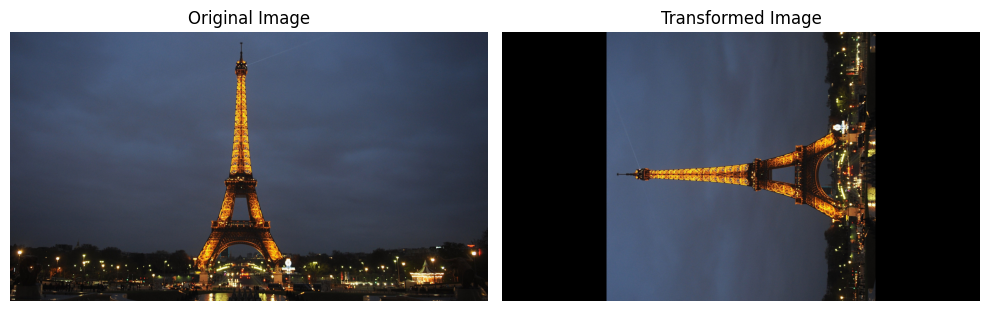

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
img = cv2.imread('eiffel_tower.jpg')

# Define the transformation matrix (for example, rotation)
rows, cols = img.shape[:2]
# Creating rotation matrix (90 degrees clockwise rotation)
rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)  # center, angle, scale

# Apply the transformation
transformed_img = cv2.warpAffine(img, rotation_matrix, (cols, rows))

# Display the original and transformed images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(122)
plt.title('Transformed Image')
plt.imshow(cv2.cvtColor(transformed_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


# Image Segmentation 

### Thresholding 

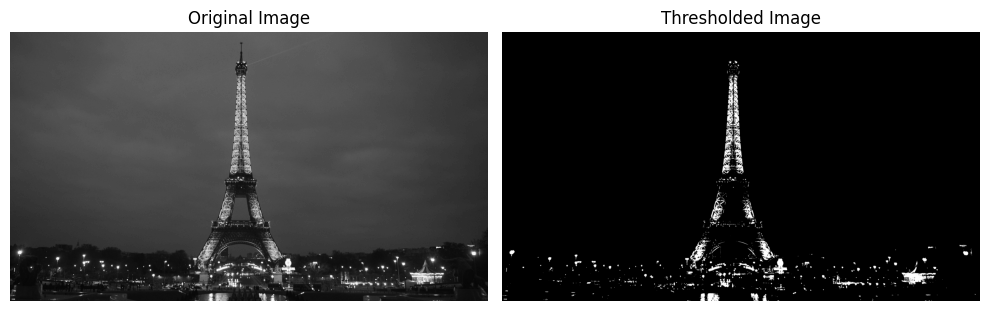

In [21]:
import cv2
from matplotlib import pyplot as plt

# Read the image in grayscale
img = cv2.imread('eiffel_tower.jpg', 0)

# Apply thresholding
ret, threshold_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Display the original and thresholded images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(122)
plt.title('Thresholded Image')
plt.imshow(threshold_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


### In Range Color Segmentation 

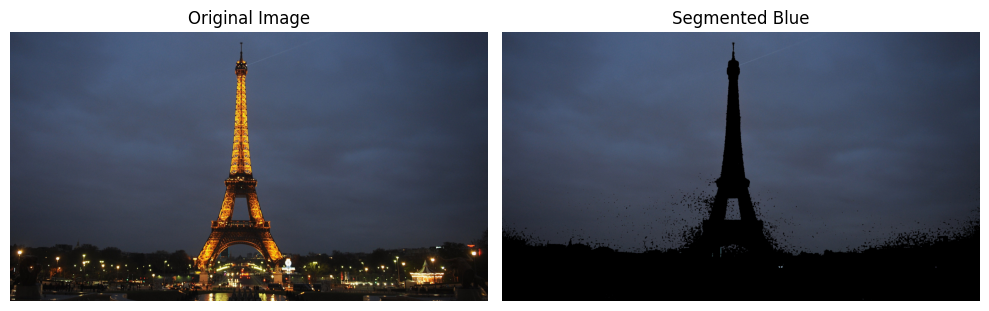

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
img = cv2.imread('eiffel_tower.jpg')

# Convert the image to HSV color space
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the lower and upper bounds of the color to segment (for example, blue)
lower_blue = np.array([90, 50, 50])  # Lower HSV values for blue
upper_blue = np.array([130, 255, 255])  # Upper HSV values for blue

# Create a mask using inRange to segment the desired color
mask = cv2.inRange(hsv_img, lower_blue, upper_blue)
segmented_img = cv2.bitwise_and(img, img, mask=mask)

# Display the original and segmented images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(122)
plt.title('Segmented Blue')
plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()


# Histogram

### Calc Hist

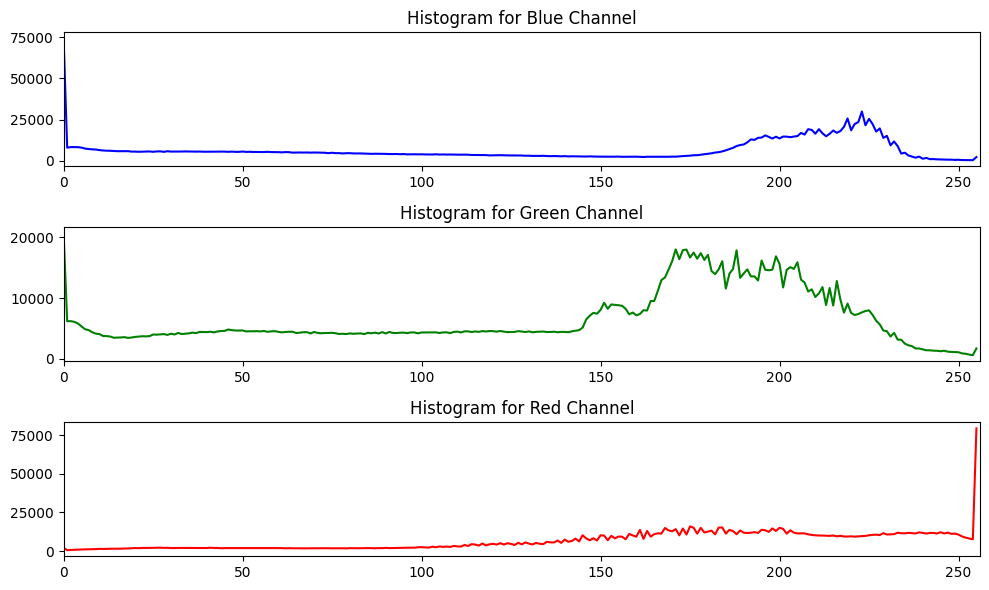

In [24]:
import cv2
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('amsterdam.jpg')

# Split the image into its color channels (B, G, R)
blue, green, red = cv2.split(img)

# Calculate histograms for each channel
hist_blue = cv2.calcHist([blue], [0], None, [256], [0, 256])
hist_green = cv2.calcHist([green], [0], None, [256], [0, 256])
hist_red = cv2.calcHist([red], [0], None, [256], [0, 256])

# Plotting histograms for RGB channels
plt.figure(figsize=(10, 6))

plt.subplot(311)
plt.title('Histogram for Blue Channel')
plt.plot(hist_blue, color='blue')
plt.xlim([0, 256])

plt.subplot(312)
plt.title('Histogram for Green Channel')
plt.plot(hist_green, color='green')
plt.xlim([0, 256])

plt.subplot(313)
plt.title('Histogram for Red Channel')
plt.plot(hist_red, color='red')
plt.xlim([0, 256])

plt.tight_layout()
plt.show()


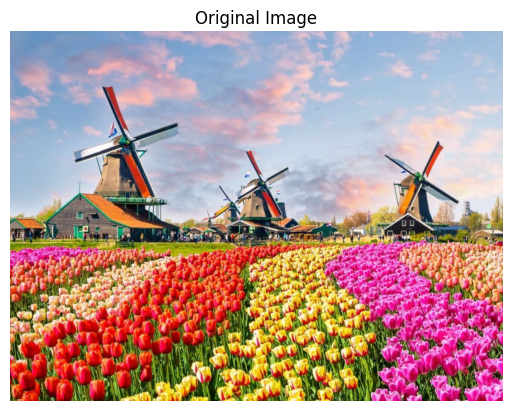

In [31]:
import cv2
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('amsterdam.jpg')

plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Turn off the axis
plt.show()
